In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import ipywidgets as widgets
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading data into the dataframe
data = pd.read_csv("/content/drive/MyDrive/YouTube Trending Data/US_youtube_trending_data.csv")


In [5]:
# loading random samples to understand data
data.sample(n = 5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
78060,9vv5zSloDl8,TEACHING ITSORAIDA AND THE BADWIGGIES HOW TO P...,2021-08-27T18:02:32Z,UCs1pojuhtNrY5DEb5707sHA,Santea,22,2021-08-31T00:00:00Z,[None],351444,25808,280,1259,https://i.ytimg.com/vi/9vv5zSloDl8/default.jpg,False,False,Love you guys! Turn post notifications on! NEW...
145349,BqTldh763Fw,100 Levels Of Roblox Bedwars Tricks,2022-07-30T20:00:12Z,UCMt7QccSCUZgp-qrLLYVybA,CubeINC,22,2022-08-04T00:00:00Z,roblox bedwars|roblox|roblox bed wars|roblox b...,418196,13151,0,1121,https://i.ytimg.com/vi/BqTldh763Fw/default.jpg,False,False,100 Levels Of Roblox Bedwars TricksAs The Leve...
170293,sXDBXVjKbp8,Sidemen - Christmas Drillings Ft. JME (Officia...,2022-12-04T18:30:43Z,UCh5mLn90vUaB1PbRRx_AiaA,MoreSidemen,10,2022-12-07T00:00:00Z,sidemen|moresidemen|miniminter|ksi|zerkaa|behz...,4506926,390986,0,13291,https://i.ytimg.com/vi/sXDBXVjKbp8/default.jpg,False,False,Go check out the main channel video to see the...
145970,2lAKtDKlUCw,Getting Lost in the Weirdest Grocery Store OME...,2022-08-04T13:00:02Z,UC4-eGDvOe41__-RiE0E9L6A,FV FAMILY,24,2022-08-08T00:00:00Z,funnel vision|chase fgteev|duddy|moomy|lex and...,974662,15830,0,2862,https://i.ytimg.com/vi/2lAKtDKlUCw/default.jpg,False,False,We celebrated Lexi turning 16 in Vegas! This ...
10437,hxDDIGJCCsk,ZooPhobia - Bad Luck Jack (Short),2020-09-30T16:26:33Z,UCzfyYtgvkx5mLy8nlLlayYg,Vivziepop,1,2020-10-03T00:00:00Z,Vivziepop|Zoophobia,2854581,368774,7812,41737,https://i.ytimg.com/vi/hxDDIGJCCsk/default.jpg,False,False,Musical score by Gooseworx!Enjoy this cartoon ...


In [6]:
# Loading another dataframe 
df = pd.read_json("/content/drive/MyDrive/YouTube Trending Data/US_category_id.json")

In [7]:
# loading random samples
df.sample(n = 3)

,kind,etag,items
19,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'LNg..."
30,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '2sK..."
23,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'FD7..."


In [8]:
# Evaluating Null Values
data.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4141
dtype: int64

Text(0.5, 1.0, 'Null Values Heatmap')

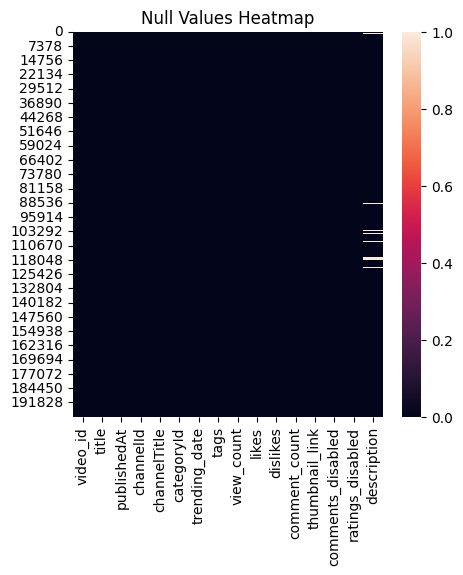

In [9]:
# Plotting Null values in a heatmap
plt.figure(figsize=(5,5))
sns.heatmap(data.isnull())
plt.title("Null Values Heatmap")

In [10]:
# dropping non-required columns
data.drop(columns=['description','tags','thumbnail_link'],inplace=True)

In [11]:
# Rechecking Null Values
data.isnull().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
view_count           0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
dtype: int64

In [12]:
# General Info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199190 entries, 0 to 199189
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           199190 non-null  object
 1   title              199190 non-null  object
 2   publishedAt        199190 non-null  object
 3   channelId          199190 non-null  object
 4   channelTitle       199190 non-null  object
 5   categoryId         199190 non-null  int64 
 6   trending_date      199190 non-null  object
 7   view_count         199190 non-null  int64 
 8   likes              199190 non-null  int64 
 9   dislikes           199190 non-null  int64 
 10  comment_count      199190 non-null  int64 
 11  comments_disabled  199190 non-null  bool  
 12  ratings_disabled   199190 non-null  bool  
dtypes: bool(2), int64(5), object(6)
memory usage: 17.1+ MB


Converting datatype of date columns and creating more columns for further analysis 

In [13]:
data['publishedAt'] = pd.to_datetime(data['publishedAt'])

In [14]:
data['trending_date'] = pd.to_datetime(data['trending_date'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199190 entries, 0 to 199189
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   video_id           199190 non-null  object             
 1   title              199190 non-null  object             
 2   publishedAt        199190 non-null  datetime64[ns, UTC]
 3   channelId          199190 non-null  object             
 4   channelTitle       199190 non-null  object             
 5   categoryId         199190 non-null  int64              
 6   trending_date      199190 non-null  datetime64[ns, UTC]
 7   view_count         199190 non-null  int64              
 8   likes              199190 non-null  int64              
 9   dislikes           199190 non-null  int64              
 10  comment_count      199190 non-null  int64              
 11  comments_disabled  199190 non-null  bool               
 12  ratings_disabled   199190 non-

In [16]:
data['p_year'] = data['publishedAt'].dt.year

In [17]:
data['t_year'] = data['trending_date'].dt.year

In [18]:
data['p_month'] = data['publishedAt'].dt.month_name()

In [19]:
data['t_month'] = data['trending_date'].dt.month_name()

In [20]:
data

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,p_year,t_year,p_month,t_month
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,1514614,156908,5855,35313,False,False,2020,2020,August,August
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,2381688,146739,2794,16549,False,False,2020,2020,August,August
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,2038853,353787,2628,40221,False,False,2020,2020,August,August
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12 00:00:00+00:00,496771,23251,1856,7647,False,False,2020,2020,August,August
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,1123889,45802,964,2196,False,False,2020,2020,August,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199185,drvPVTMQ8fU,Film Theory: Mario is IMMORTAL! (Super Mario M...,2023-04-23 17:05:07+00:00,UC3sznuotAs2ohg_U__Jzj_Q,The Film Theorists,1,2023-04-30 00:00:00+00:00,2475971,109521,0,6203,False,False,2023,2023,April,April
199186,0nMgqZtksyc,Aaron Rodgers Has OFFICIALLY Been Traded To Th...,2023-04-24 20:40:51+00:00,UCxcTeAKWJca6XyJ37_ZoKIQ,The Pat McAfee Show,17,2023-04-30 00:00:00+00:00,519306,10084,0,1306,False,False,2023,2023,April,April
199187,X0dLL4uYivE,My First Game In Japan Broke Records,2023-04-23 15:15:01+00:00,UCczKsS4gTjJzU5zayrNnwEA,Trevor Bauer,17,2023-04-30 00:00:00+00:00,1100305,28114,0,1328,False,False,2023,2023,April,April
199188,oWc6RY8U6KQ,MY DAUGHTER'S DREAM VACATION in Alphabetical O...,2023-04-22 14:00:09+00:00,UCKaCalz5N5ienIbfPzEbYuA,Jordan Matter,24,2023-04-30 00:00:00+00:00,7368531,105583,0,72654,False,False,2023,2023,April,April


In [21]:
# Shape of data
data.shape

(199190, 17)

In [22]:
data['video_id'].nunique()

36279

In [23]:
len(data[data['video_id'] == '3C66w5Z0ixs'])

7

There are only 36279 unique video_id in the whole 1,99,190 records. So it implies that the video_id are getting repeated. As a solution I'm grouping the data with video_id 

In [24]:
video = data.groupby('video_id').max().reset_index()

In [25]:
video

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,p_year,t_year,p_month,t_month
0,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-15 00:00:00+00:00,6823249,262692,4107,16445,False,False,2021,2021,June,June
1,--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09 23:19:08+00:00,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,24,2022-03-15 00:00:00+00:00,538485,17290,0,1439,False,False,2022,2022,March,March
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,2021-09-20 01:03:32+00:00,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,24,2021-09-25 00:00:00+00:00,682609,8029,369,723,False,False,2021,2021,September,September
3,--5-brQiQFg,Washington Commanders vs. San Francisco 49ers ...,2022-12-25 00:30:17+00:00,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,2022-12-26 00:00:00+00:00,1280997,14603,0,2078,False,False,2022,2022,December,December
4,--DKkzWVh-E,Why Retaining Walls Collapse,2021-12-07 13:00:00+00:00,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,27,2021-12-11 00:00:00+00:00,623949,29991,320,998,False,False,2021,2021,December,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36274,zzCrFWjKPy8,Season 1 Episode 3 Preview | House of the Drag...,2022-08-29 02:00:10+00:00,UCQzdMyuz0Lf4zo4uGcEujFw,GameofThrones,22,2022-09-03 00:00:00+00:00,2603821,47431,0,3586,False,False,2022,2022,August,September
36275,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,2021-02-12 05:03:49+00:00,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,10,2021-02-21 00:00:00+00:00,13974461,728439,7579,57012,False,False,2021,2021,February,February
36276,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,2021-01-16 05:39:05+00:00,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2021-01-18 00:00:00+00:00,2598512,20024,989,2872,False,False,2021,2021,January,January
36277,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02 09:00:10+00:00,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-09 00:00:00+00:00,9389223,584431,3403,77267,False,False,2021,2021,June,June


In [26]:
# Rows & Columns of grouped dataframe 
video.shape

(36279, 17)

Extracting ID's from second dataframe(df) to create a new dataframe which would contain Id's and categories

In [27]:
# Extracting Id's
ids = [df['items'][i]['id'] for i in range(32) ]

In [28]:
df['items'][2]['snippet']['title']

'Music'

In [29]:
#Extracting categories
gen = [df['items'][i]['snippet']['title'] for i in range(32) ]

In [30]:
gen

['Film & Animation',
 'Autos & Vehicles',
 'Music',
 'Pets & Animals',
 'Sports',
 'Short Movies',
 'Travel & Events',
 'Gaming',
 'Videoblogging',
 'People & Blogs',
 'Comedy',
 'Entertainment',
 'News & Politics',
 'Howto & Style',
 'Education',
 'Science & Technology',
 'Nonprofits & Activism',
 'Movies',
 'Anime/Animation',
 'Action/Adventure',
 'Classics',
 'Comedy',
 'Documentary',
 'Drama',
 'Family',
 'Foreign',
 'Horror',
 'Sci-Fi/Fantasy',
 'Thriller',
 'Shorts',
 'Shows',
 'Trailers']

In [31]:
# creating new DataFrame
genre = pd.DataFrame({'categoryId' : ids , 'Genre' : gen})


In [32]:
genre.sample(n = 3)

,categoryId,Genre
30,43,Shows
2,10,Music
23,36,Drama


In [33]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   categoryId  32 non-null     object
 1   Genre       32 non-null     object
dtypes: object(2)
memory usage: 644.0+ bytes


In [34]:
# Changing the datatype of categoryId from Object to Int
genre['categoryId'] = genre['categoryId'].astype(int)

Merging two Dataframes video & genre

In [35]:
video.head(1)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,p_year,t_year,p_month,t_month
0,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-15 00:00:00+00:00,6823249,262692,4107,16445,False,False,2021,2021,June,June


In [36]:
genre.head(1)

,categoryId,Genre
0,1,Film & Animation


In [37]:
video = pd.merge(video,genre,on = 'categoryId',how = 'inner')

# Exploratory Data Analysis

In [38]:
video

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,p_year,t_year,p_month,t_month,Genre
0,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-15 00:00:00+00:00,6823249,262692,4107,16445,False,False,2021,2021,June,June,Music
1,--FmExEAsM8,IVE 아이브 'ELEVEN' MV,2021-12-01 09:00:03+00:00,UCYDmx2Sfpnaxg488yBpZIGg,starshipTV,10,2021-12-06 00:00:00+00:00,31967789,810589,14252,52092,False,False,2021,2021,December,December,Music
2,--SvHNpSvpk,YoungBoy Never Broke Again - Dead Trollz [Offi...,2020-09-11 15:00:00+00:00,UClW4jraMKz6Qj69lJf-tODA,YoungBoy Never Broke Again,10,2020-09-18 00:00:00+00:00,5308719,175482,4544,15346,False,False,2020,2020,September,September,Music
3,--smQkLRmrY,Machine Gun Kelly - Downfalls High (Teaser Tra...,2020-11-23 03:55:01+00:00,UCUs8sGiP4avNaYNVO22INhQ,Machine Gun Kelly,10,2020-11-29 00:00:00+00:00,571786,41861,867,0,False,False,2020,2020,November,November,Music
4,-08hDAreWPk,Dear Slim,2021-05-13 10:09:33+00:00,UC4dQtIkNtx0q4WE1vt6O1OA,Tom MacDonald - Topic,10,2021-05-20 00:00:00+00:00,397732,29357,2213,45,False,False,2021,2021,May,May,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36274,nGJGnXkWJ20,It Counts,2020-10-21 21:15:10+00:00,UCuQ9PbS08dQJNWfwjQE-Fnw,Annie LeBlanc,29,2020-10-27 00:00:00+00:00,442906,40462,554,2773,False,False,2020,2020,October,October,Nonprofits & Activism
36275,nLW1Acynvb4,RETURNING To YouTube? Our CHARITY FUNDRAISER! ...,2020-10-20 16:59:18+00:00,UC6kFD5xIFvWyLlytv5pTR1w,DissociaDID,29,2020-10-26 00:00:00+00:00,377273,70046,857,10832,False,False,2020,2020,October,October,Nonprofits & Activism
36276,vwSXOPq9u80,"Happy Birthday, #TeamTrees!",2020-10-25 14:19:34+00:00,UCTzBfQF4z2ZdXRbfWazLlrQ,#TeamTrees,29,2020-10-31 00:00:00+00:00,809044,56071,444,3770,False,False,2020,2020,October,October,Nonprofits & Activism
36277,wAXcMD5dOBA,BTS Shine Spotlight on the United Nations as E...,2021-09-21 02:16:44+00:00,UC5O114-PQNYkurlTg6hekZw,United Nations,29,2021-09-25 00:00:00+00:00,4745668,602106,3147,13670,False,False,2021,2021,September,September,Nonprofits & Activism


### No. Of videos released Annually

In [39]:
annually_published = video.groupby(by = 'p_year').count()

In [40]:
annually_published

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,t_year,p_month,t_month,Genre
p_year,,,,,,,,,,,,,,,,,
2020,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276
2021,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969
2022,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918
2023,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116


Text(0, 0.5, 'no. of videos published')

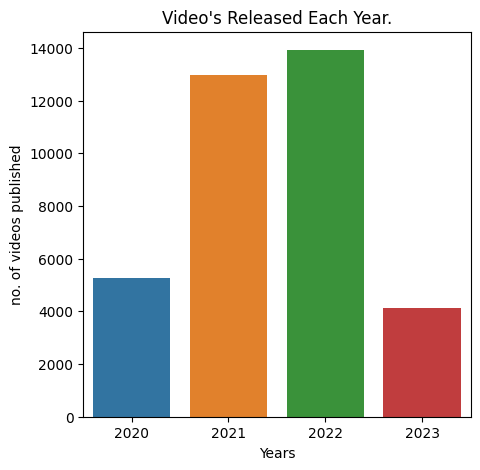

In [41]:
# Plotting Annual released videos
plt.figure(figsize=(5,5))
sns.barplot(x = annually_published.index , y = annually_published['video_id'])
plt.title("Video's Released Each Year.")
plt.xlabel("Years")
plt.ylabel("no. of videos published")

### Distribution of Genre's

In [42]:
# Getting the distribution of each Genre
category_counts = video['Genre'].value_counts()

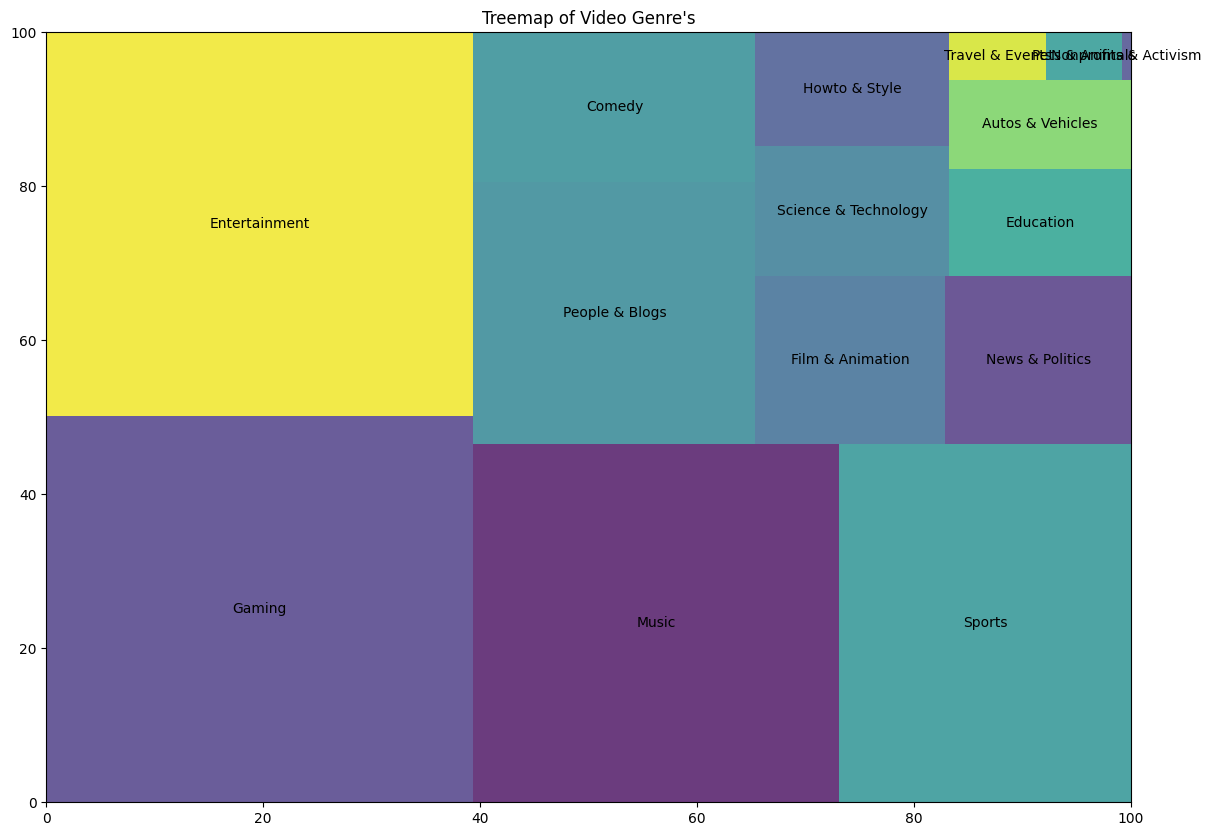

In [44]:

# Create a figure for Genre distribution
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot()

# Create a treemap using squarify library
squarify.plot(sizes=category_counts.values, 
              label=category_counts.index, 
              alpha=0.8, ax=ax)

# Add title and display plot
plt.title("Treemap of Video Genre's")
plt.show()


### Plotting Trending Genre's each Year

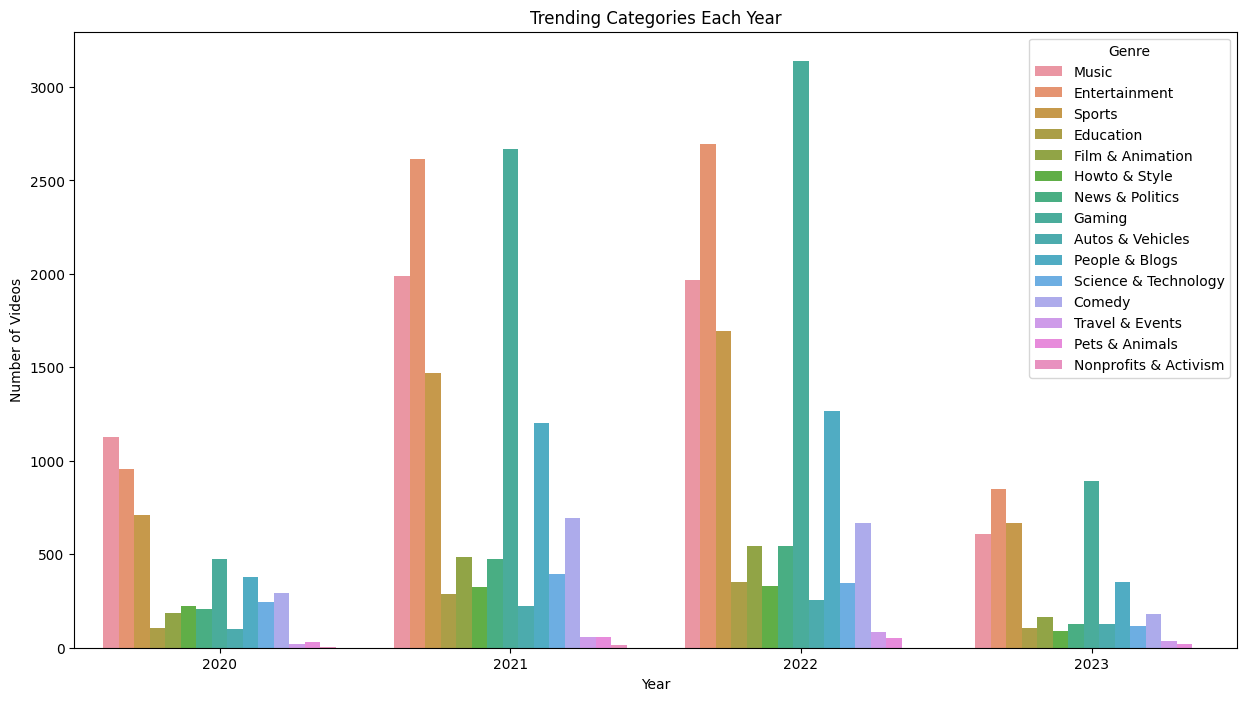

In [46]:

plt.figure(figsize=(15,8))
sns.countplot(x='t_year', hue='Genre', data=video)
plt.title('Trending Categories Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Videos')
plt.show()


### Visualizing Genre's w.r.t Numerical Features using Ipywidgets
(view_count,likes,dislikes,comment_count)

In [47]:
conn = widgets.Dropdown(
    options=[ 'view_count','likes', 'dislikes','comment_count'],
    value='likes',
    description='Select option:',
    disabled=False,
)


In [48]:
conn

Dropdown(description='Select option:', index=1, options=('view_count', 'likes', 'dislikes', 'comment_count'), …

In [49]:
def graph(a):
  plt.figure(figsize=(9,9))
  sns.barplot(y = 'Genre', x = a , data = video, estimator = sum)
  plt.show()


In [50]:
widgets.interact(graph,a = conn)

interactive(children=(Dropdown(description='Select option:', index=1, options=('view_count', 'likes', 'dislike…

<function __main__.graph(a)>

### Getting Top 5 Videos based On Genre's & Numerical Features using Ipywidgets

In [51]:

c = widgets.Dropdown(
    options=gen,
    value='Music',
    description='Number:',
    disabled=False,
)

conn = widgets.Dropdown(
    options=['view_count', 'likes', 'dislikes', 'comment_count'],
    value='likes',
    description='Select option:',
    disabled=False,
)

def graph(a,b):
    new = video[video['Genre'] == a]
    channel = new.groupby('channelTitle')
    fin = channel[b].sum().sort_values(ascending=False).head()
    sns.barplot(y=fin.index, x=fin.values)
    plt.show()

widgets.interact(graph, a=c,b = conn)


interactive(children=(Dropdown(description='Number:', index=2, options=('Film & Animation', 'Autos & Vehicles'…

<function __main__.graph(a, b)>

### Saving the Dataframe to a CSV file for preprocessing and model building

In [65]:
video.to_csv('grouped_data.csv')